In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Ejercicio 1
### A )
#### i) Generar histogramas para visualizar la distribución de tipos de vehículo, años de fabricación y kilómetros recorridos.

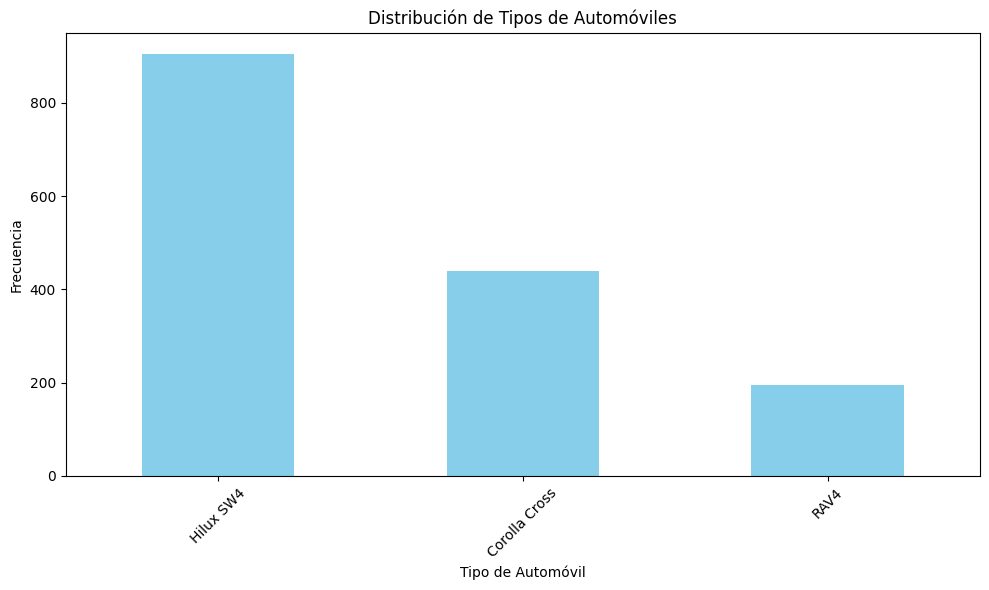

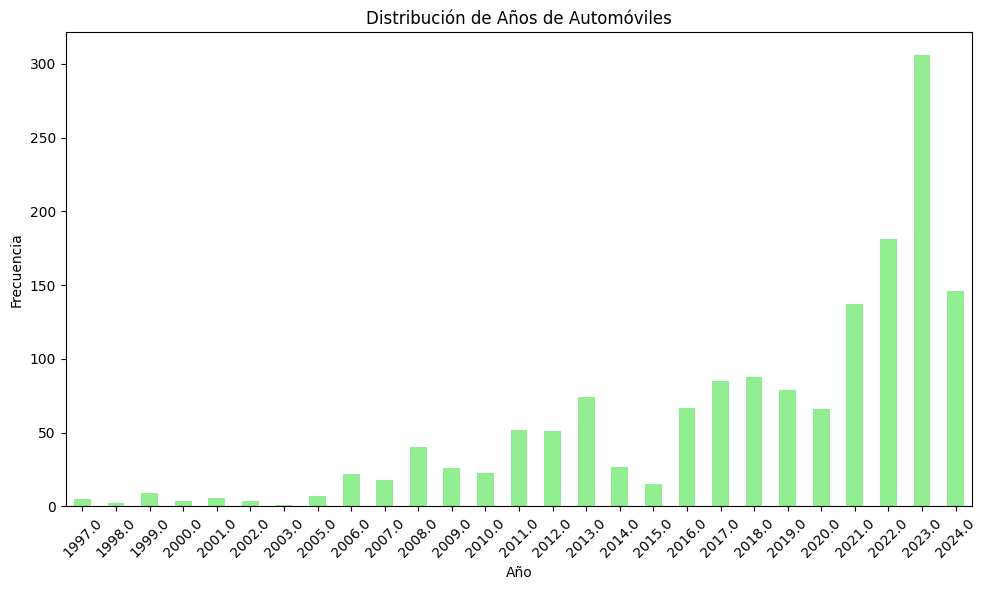

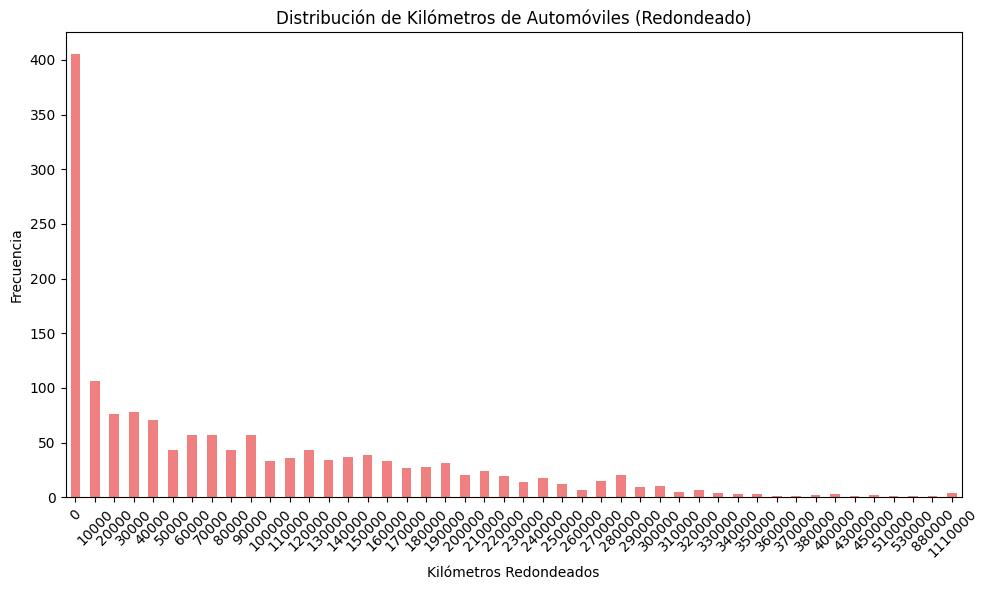

In [23]:
archivo_csv = '../data/raw/toyota_dev.csv'
data = pd.read_csv(archivo_csv)
data.columns = data.columns.str.strip()

plt.figure(figsize=(10, 6))
data['Tipo'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribución de Tipos de Automóviles')
plt.xlabel('Tipo de Automóvil')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
data['Año'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title('Distribución de Años de Automóviles')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

data['Kilómetros'] = data['Kilómetros'].str.replace(' km', '').astype(int)
data['Kilómetros_redondeado'] = (data['Kilómetros'] // 10000) * 10000
plt.figure(figsize=(10, 6))
data['Kilómetros_redondeado'].value_counts().sort_index().plot(kind='bar', color='lightcoral')
plt.title('Distribución de Kilómetros de Automóviles (Redondeado)')
plt.xlabel('Kilómetros Redondeados')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


En el dataset se encuentran los datos de tres tipos diferentes de vehículos Toyota, siendo en su mayoría del modelo Hilux SW4. Todos los vehículos fueron fabricados entre los años 1997 y 2024, pero este dataset pareciera presentar más información sobre los autos más recientes y menos sobre los más antiguos. Una gran cantidad de estos autos se vendieron como 0 km, pero también hay otros que se vendieron con kilometrajes mayores, siendo menos de estos a medida que sube el kilometraje. 

#### ii) Crear gráficos de dispersión para analizar la cobertura de datos en el espacio de kilómetros recorridos y años de fabricación, diferenciando por tipo de vehículo

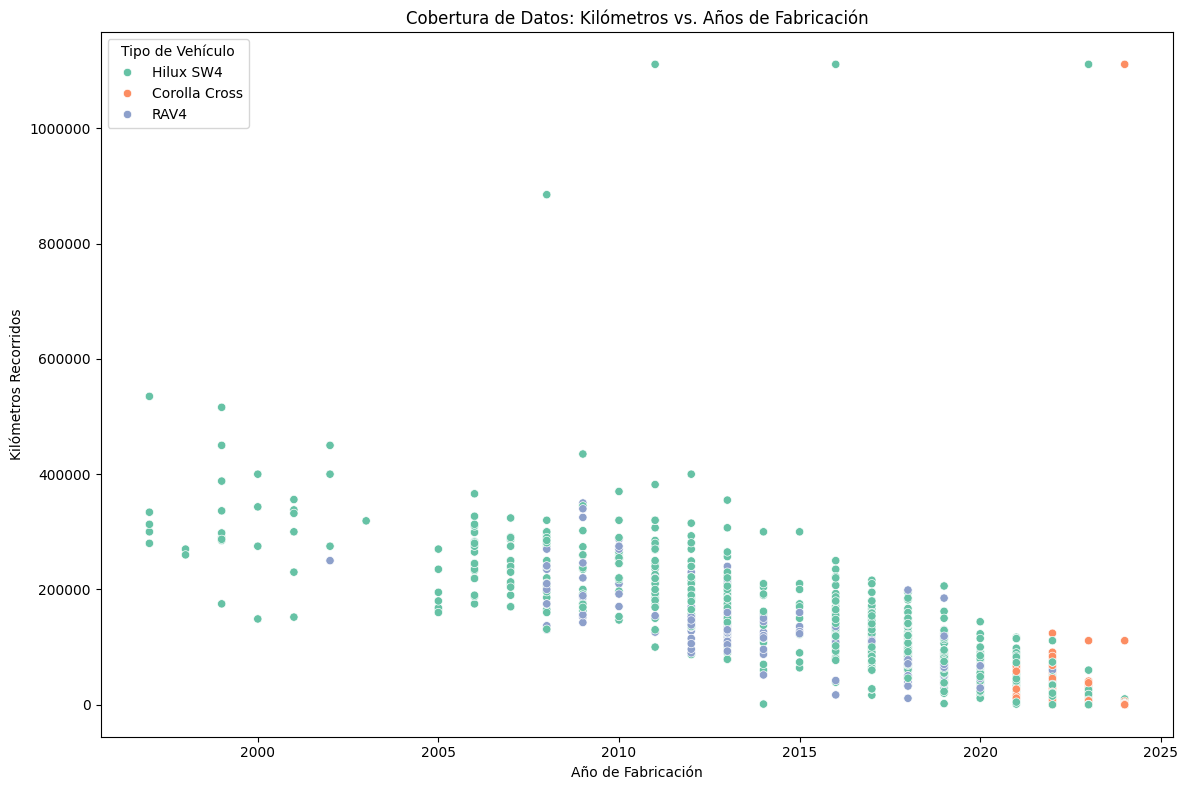

In [24]:
archivo_csv = '../data/raw/toyota_dev.csv'
data = pd.read_csv(archivo_csv)
data.columns = data.columns.str.strip()
data['Kilómetros'] = data['Kilómetros'].str.replace(' km', '').astype(int)

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Año', y='Kilómetros', hue='Tipo', data=data, palette='Set2')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x)}'))
plt.title('Cobertura de Datos: Kilómetros vs. Años de Fabricación')
plt.xlabel('Año de Fabricación')
plt.ylabel('Kilómetros Recorridos')
plt.legend(title='Tipo de Vehículo')
plt.tight_layout()
plt.show()



Generalmente los datos siguen una distribución lineal negativa con respecto al año del vehículo y su kilometraje, ya que más viejo es, más tiempo tuvo para recorrer las rutas. Es decir que mientras más viejo el auto, mayor su distancia recorrida. Aunque se presentan algunos casos que rompen con esta idea, en su gran mayoría se presenta esta relación. 

#### iii) Visualizar la distribución de la variable “Motor” según el tipo de vehículo. ¿Cómo podría agrupar o simplificar las categorías para obtener un análisis más claro?

/var/folders/41/r2_v33t512j_hc2xpxfmbjpr0000gn/T/ipykernel_3565/4111502302.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Tipo', y='Motor', data=data, palette='Set2')


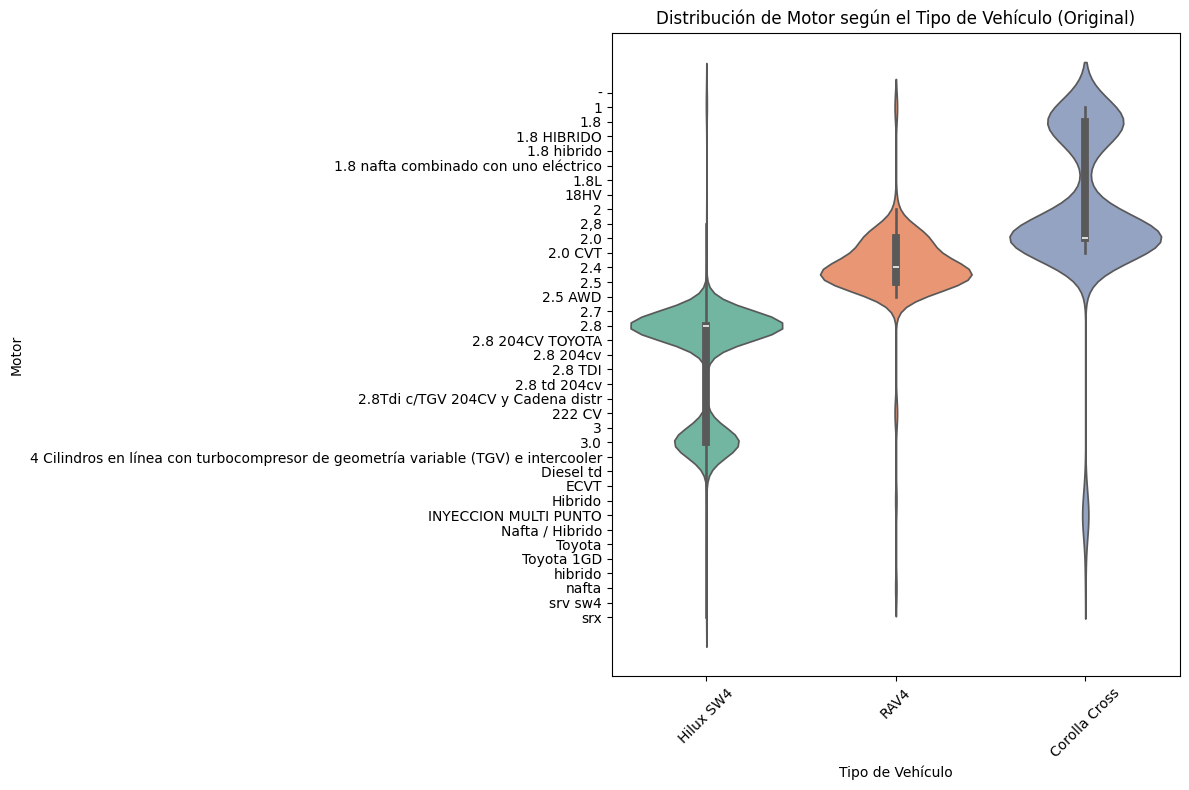

/var/folders/41/r2_v33t512j_hc2xpxfmbjpr0000gn/T/ipykernel_3565/4111502302.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Tipo', y='Motor', data=data_modificado, palette='Set2')


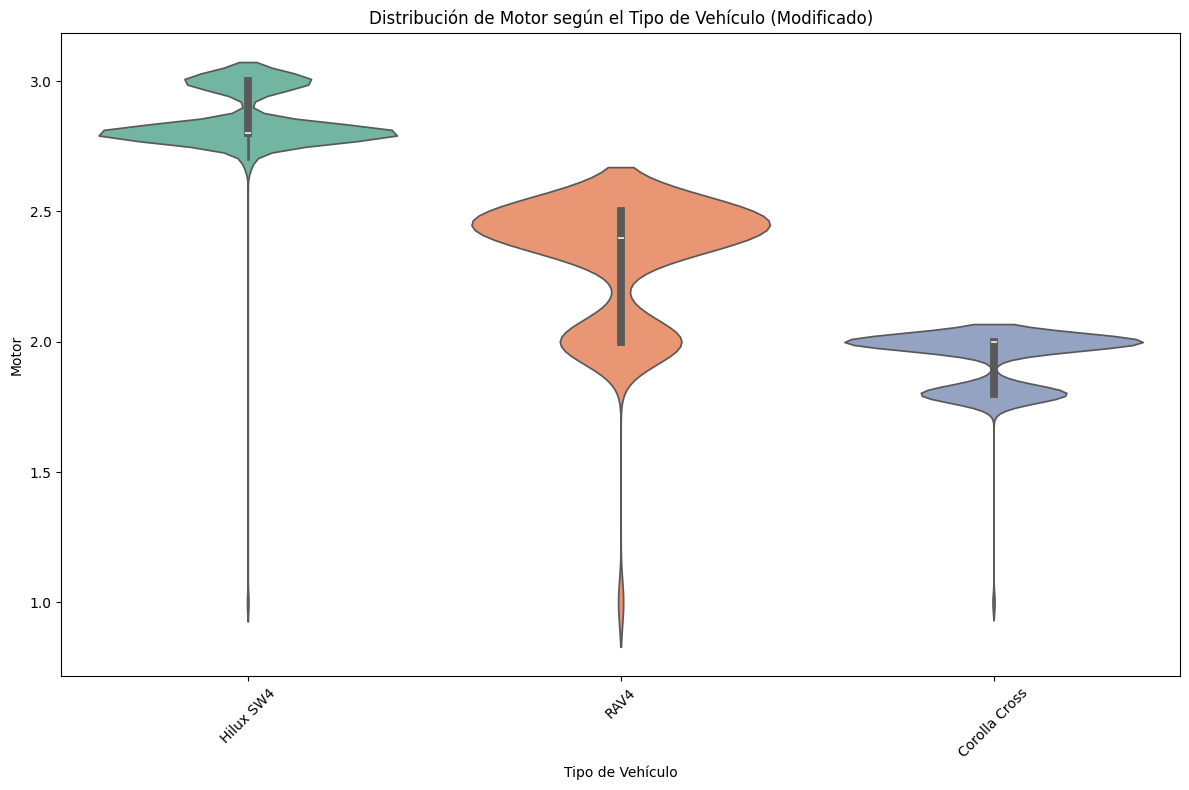

In [32]:
archivo_csv = '../data/raw/toyota_dev.csv'
data = pd.read_csv(archivo_csv)
data.columns = data.columns.str.strip()
data = data.sort_values(by='Motor')

plt.figure(figsize=(12, 8))
sns.violinplot(x='Tipo', y='Motor', data=data, palette='Set2')
plt.title('Distribución de Motor según el Tipo de Vehículo (Original)')
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Motor')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

archivo_csv_modificado = '../data/procesed/cambios_en_motores.csv'
data_modificado = pd.read_csv(archivo_csv_modificado)
data_modificado.columns = data_modificado.columns.str.strip()
data_modificado = data_modificado.sort_values(by='Motor')

plt.figure(figsize=(12, 8))
sns.violinplot(x='Tipo', y='Motor', data=data_modificado, palette='Set2')
plt.title('Distribución de Motor según el Tipo de Vehículo (Modificado)')
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Motor')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Cuando se comparó el tipo de motor con los datos "crudos" se pudo observar que en varios casos había errores sobre cómo estaba escrito el número que representa el motor (es decir la cilindrada en litros) o casos en los que el campo ni siquiera estaba siendo completado con esa información. Es por eso, que para limpiar los datos se realizó un filtrado que eliminó datos irrelevantes, cambió de tipo los números de int a float, y en caso de mostrar la cantidad de caballos de fuerza en vez del tipo de motor, se buscó que modelo tiene esa potencia en caballos de fuerza para mostrar su motor correctamente. 

Al graficar los datos procesados fue fácil ver qué motores poseen los diferentes tipos de vehículos, concluyendo en que la RAV4 tiene mayoritariamente motores 2.0, 2.4 y 2.5; también que las Hilux SW4 se fabrican con motores 2.8 y 3.0; y que el Corolla Cross se vende con motor 1.8 y 2.0.

#### iv) Comparar la distribución de los tipos de transmisión en función del tipo de vehículo utilizando gráficos adecuados


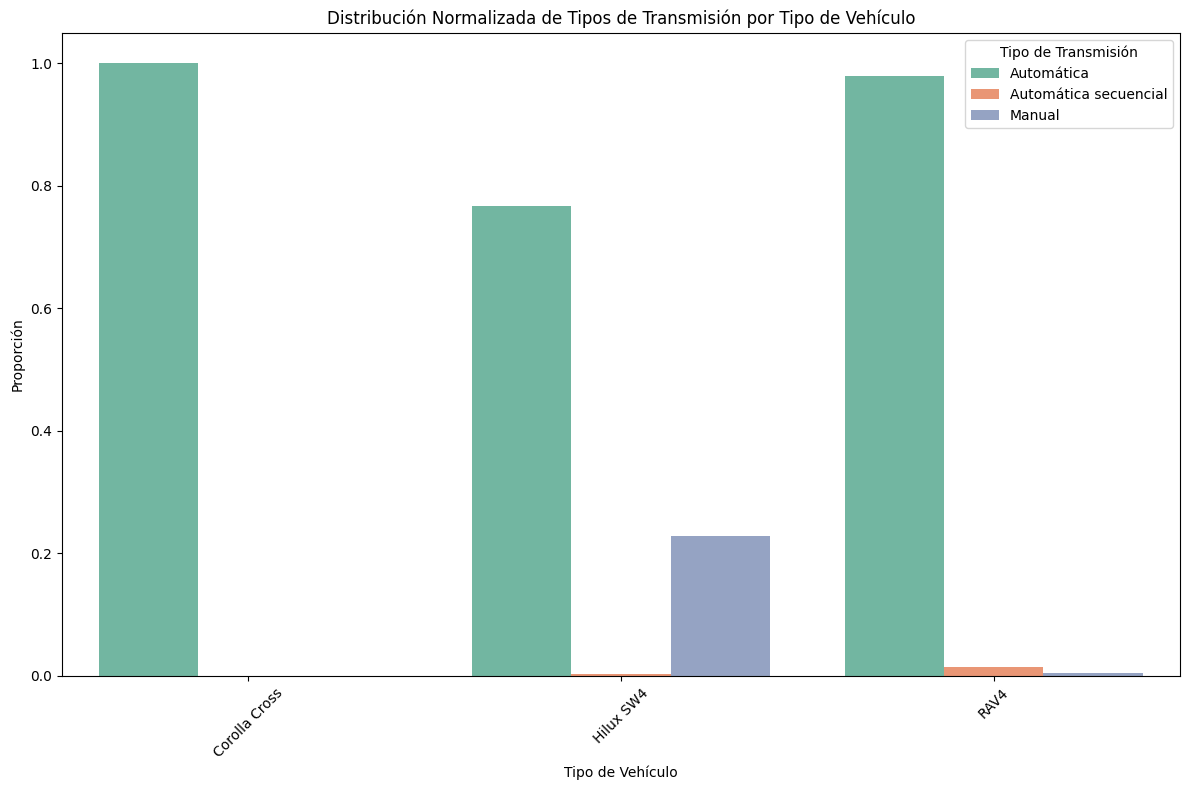

In [26]:
archivo_csv = '../data/raw/toyota_dev.csv'
data = pd.read_csv(archivo_csv)
data.columns = data.columns.str.strip()

data_grouped = data.groupby(['Tipo', 'Transmisión']).size().reset_index(name='Count')
data_totals = data_grouped.groupby('Tipo')['Count'].transform('sum')
data_grouped['Proportion'] = data_grouped['Count'] / data_totals

plt.figure(figsize=(12, 8))
sns.barplot(x='Tipo', y='Proportion', hue='Transmisión', data=data_grouped, palette='Set2')
plt.title('Distribución Normalizada de Tipos de Transmisión por Tipo de Vehículo')
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Proporción')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Transmisión')
plt.tight_layout()
plt.show()


Dada a la diferencia de cantidad de datos entre los tipos de vehículo se normalizaron estos para una visualización más provechosa. Con estos datos es posible decir que el Corolla Cross se vende en su totalidad con caja automática. Esto puede deberse a que es un modelo nuevo (creado en 2021) entonces posee la caja de cambios más actualizada. También podemos notar que la Hilux SW4 se vende mayoritariamente con caja automática aunque también, en una proporción menor, se vende con caja de cambios manual. Es el modelo que más vende con caja manual. Una pequeña porción de las Hilux se vende con caja automática secuencial, que a grandes rasgos es parte de la categoría de caja automática. Por último la RAV4 se vende también en su mayoría con caja automática pero en una propoción muchísimo menor también se vende con caja manual. 

#### v) Analizar cómo se distribuye la variable “Color” entre los distintos tipos de vehículo.

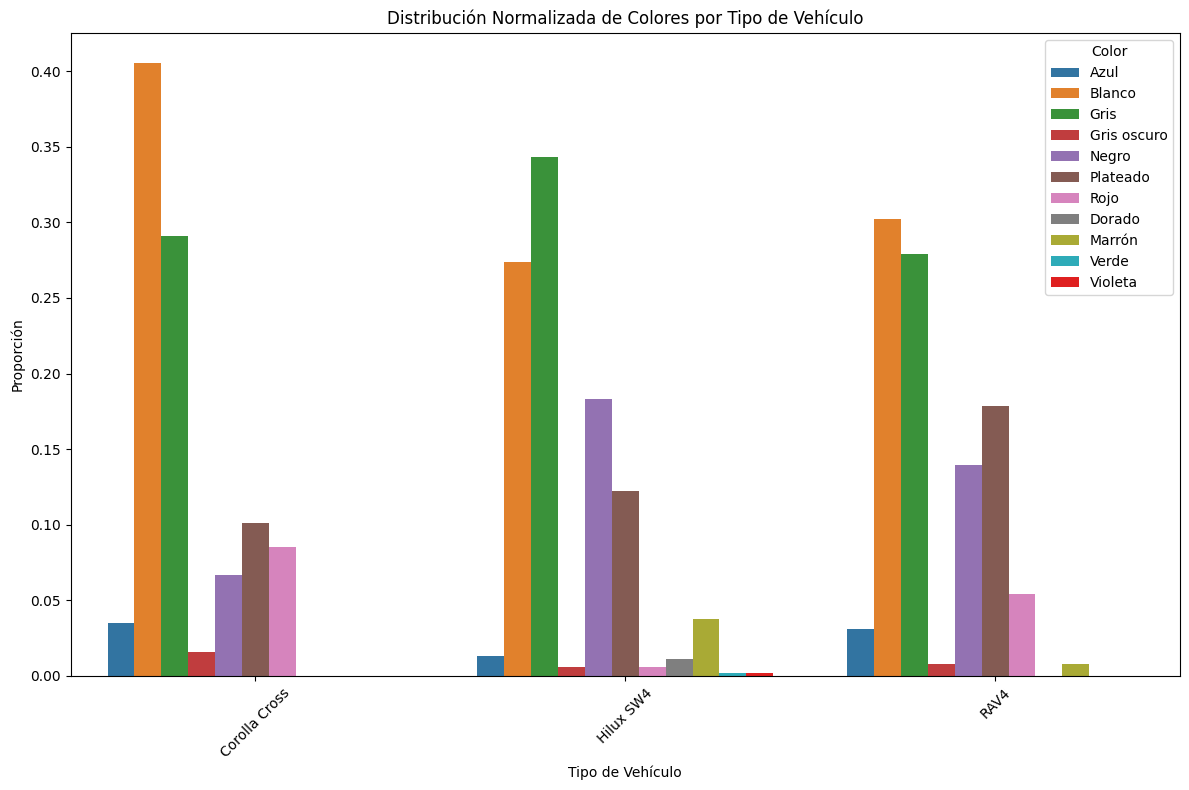

In [27]:
archivo_csv = '../data/procesed/cambios_en_colores.csv'
data = pd.read_csv(archivo_csv)
data.columns = data.columns.str.strip()
data_grouped = data.groupby(['Tipo', 'Color']).size().reset_index(name='Count')
data_totals = data_grouped.groupby('Tipo')['Count'].transform('sum')
data_grouped['Proportion'] = data_grouped['Count'] / data_totals

unique_colors = data_grouped['Color'].unique()
num_colors = len(unique_colors)
color_palette = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', 
    '#7f7f7f', '#bcbd22', '#17becf', '#ff0000', '#00ff00', '#0000ff', '#ffff00',
    '#ff00ff', '#00ffff', '#800000', '#008000', '#000080', '#808000', '#800080', 
    '#008080', '#f0f0f0', '#a0a0a0', '#d0d0d0', '#606060', '#c0c0c0'
][:num_colors]  

plt.figure(figsize=(12, 8))
sns.barplot(x='Tipo', y='Proportion', hue='Color', data=data_grouped, palette=dict(zip(unique_colors, color_palette)))
plt.title('Distribución Normalizada de Colores por Tipo de Vehículo')
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Proporción')
plt.xticks(rotation=45)
plt.legend(title='Color')
plt.tight_layout()
plt.show()


El color que predomina en los modelos no es el mismo para todos, pero el "top 2" permanece igual en los tres casos. En el Corolla Cross el color que predomina es el blanco, en el modelo Hilux SW4 predomina el color gris y en la RAV4 predominan ambos. El tercer color más elegido para el Corolla Cross y la RAV4 es el plateado, mientras que para la Hilux es el negro.  

### B )
#### i) Visualizar cómo varía el precio de venta en función de los kilómetros recorridos por el vehículo. ¿Observa la misma tendencia para los diferentes tipos de vehículo?

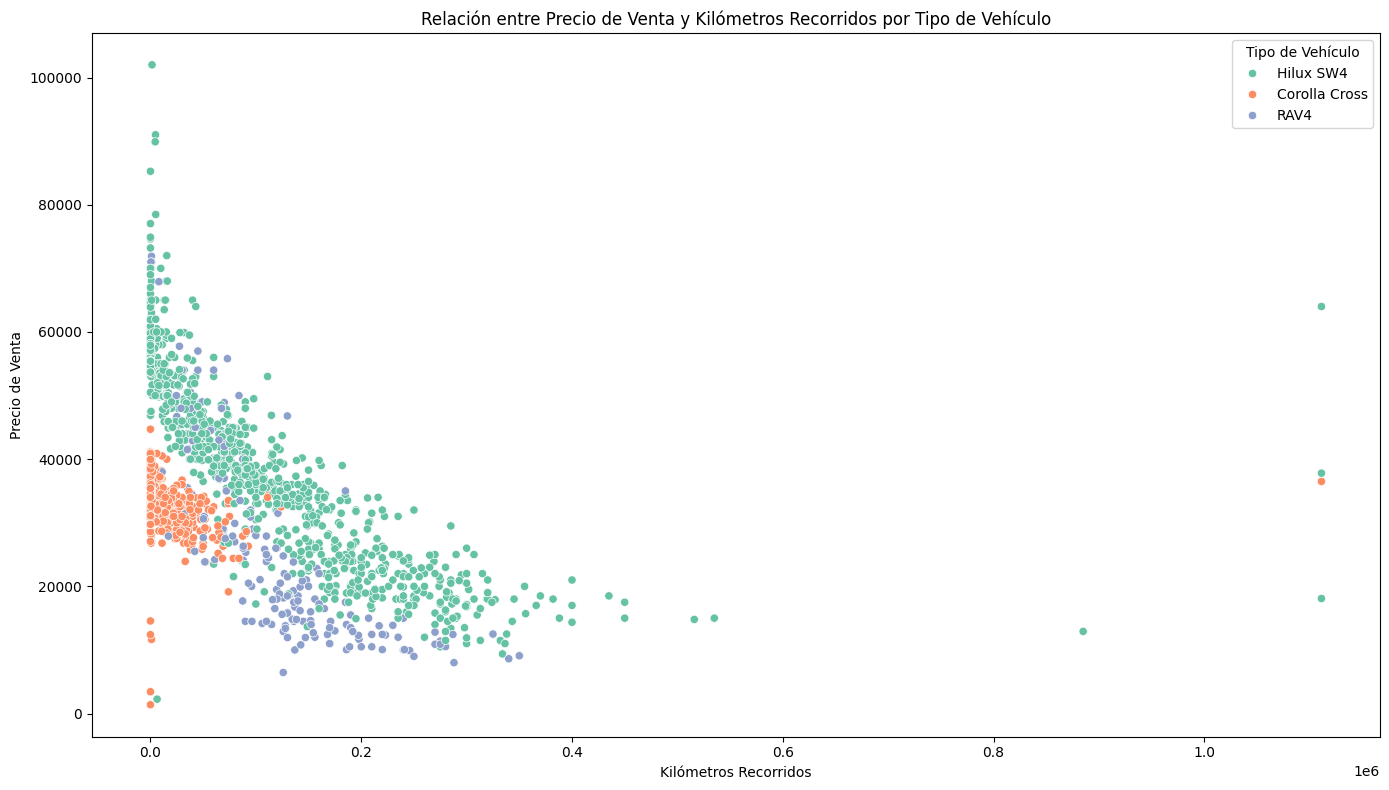

In [28]:
archivo_csv = '../data/raw/toyota_dev.csv'
data = pd.read_csv(archivo_csv)
data.columns = data.columns.str.strip()
data['Kilómetros'] = data['Kilómetros'].str.replace(' km', '').astype(int)
data['Precio'] = pd.to_numeric(data['Precio'], errors='coerce')
data_cleaned = data.dropna(subset=['Precio', 'Kilómetros'])

plt.figure(figsize=(14, 8))
sns.scatterplot(x='Kilómetros', y='Precio', hue='Tipo', data=data_cleaned, palette='Set2')
plt.title('Relación entre Precio de Venta y Kilómetros Recorridos por Tipo de Vehículo')
plt.xlabel('Kilómetros Recorridos')
plt.ylabel('Precio de Venta')
plt.legend(title='Tipo de Vehículo')
plt.tight_layout()
plt.show()


Todos los tipos de vehículos Toyota siguen la tendencia de que a medida que aumenta el kilometraje del auto disminuye su precio. Es apreciable que no todos los 0 km valen lo mismo, ya que una Hilux SW4 0 km promedio es más cara que los otros dos modelos cuando estos no tienen kilómetros recorridos.

#### ii) Comparar la distribución de precios de venta entre los distintos tipos de SUV. ¿Identifica la presencia de outliers?

En el gráfico anterior es posible identificar datos atípicos (Outliers). Algunos de estos son los vehículos 0 km que se venden a un precio menos a 19000 USD. Es posible que se esté pasando por alto otra variable sobre estos vehículos, como el motor o el año, pero dado a que hay varios modelos Corolla Cross en ese área, y que este es un vehículo que se vende desde el 2021, estos no pueden ser demasiado antiguos como para que este factor baje el precio de esta manera significante. Otro dato atípico es la Hilux SW4 que tiene más de 100000 km y se vende a un precio parecio mayor a varios 0 km promedio de ese mismo modelo; teniendo en cuenta el desgaste que tiene un auto con más de 100000 km el valor debería ser menor. 

#### iii) Analizar la distribución del precio de venta según el año del vehículo.

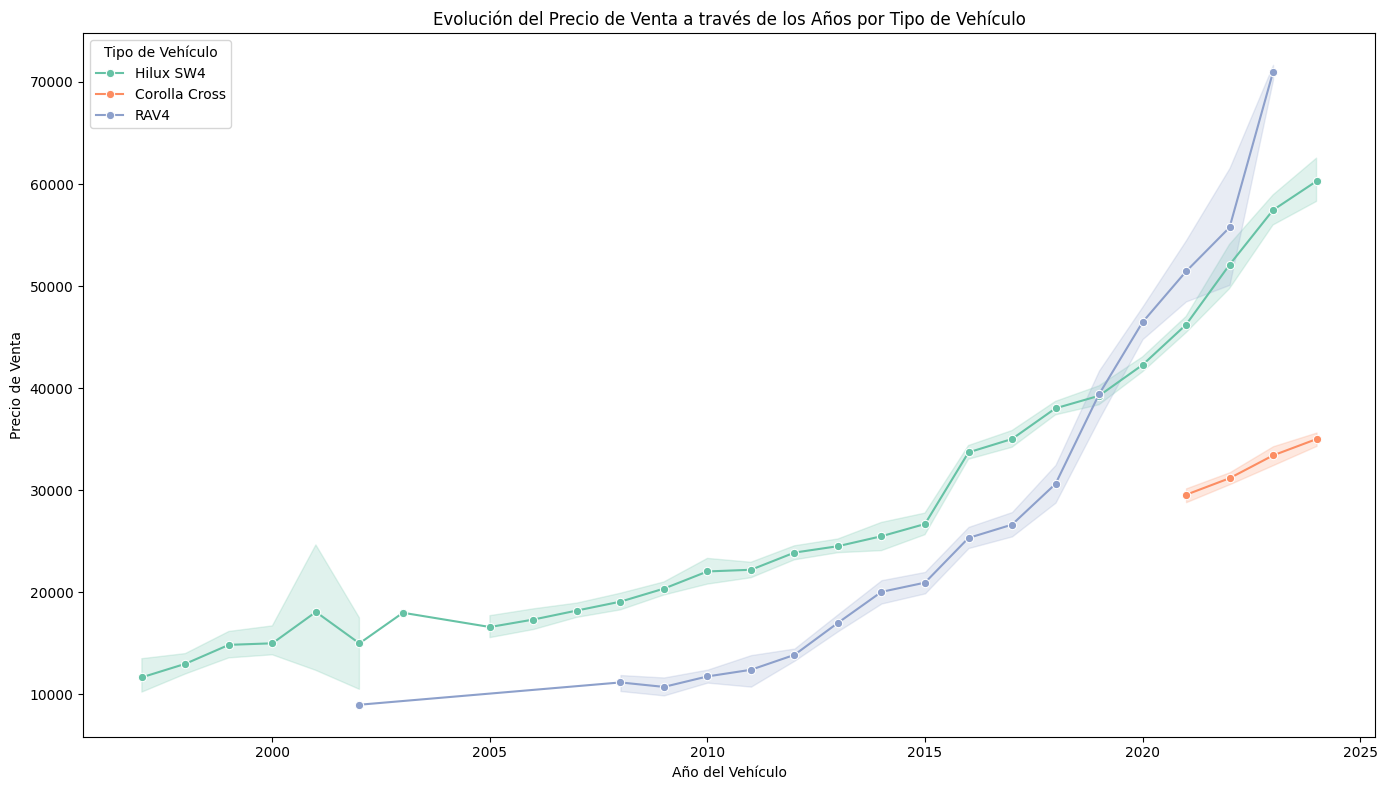

In [29]:
archivo_csv = '../data/raw/toyota_dev.csv'
data = pd.read_csv(archivo_csv)
data.columns = data.columns.str.strip()
data['Precio'] = pd.to_numeric(data['Precio'], errors='coerce')
data['Año'] = pd.to_numeric(data['Año'], errors='coerce')
data = data.dropna(subset=['Precio', 'Año'])
tipos_deseados = ['Hilux SW4', 'Corolla Cross', 'RAV4']
filtered_data = data[data['Tipo'].isin(tipos_deseados)]

plt.figure(figsize=(14, 8))
sns.lineplot(x='Año', y='Precio', hue='Tipo', data=filtered_data, palette='Set2', marker='o')
plt.title('Evolución del Precio de Venta a través de los Años por Tipo de Vehículo')
plt.xlabel('Año del Vehículo')
plt.ylabel('Precio de Venta')
plt.legend(title='Tipo de Vehículo')
plt.tight_layout()
plt.show()

En este gráfico se puede observar como a medida que aumenta el año de fabricación, aumenta el precio del vehículo. Dado a que el Corolla Cross se fabrica desde 2021 no hay datos anteriores a esa fecha. También se puede apreciar que, de todos los vehículos fabricados hasta 2018 la Hilux es más cara, pero de ahí en adelante la RAV4 se muestra más costosa. Esto se puede deber a la llegada de los autos híbridos Toyota a la Argentina en 2019, ya que es en ese año que la marca trae la RAV4 híbrida a la región. También puede ser efecto de que en noviembre de 2023 Toyota anunció que hay un defecto en los vehículos RAV4 fabricados entre 2013 y 2018 que podría provocar un incendio de la batería. Estas podrían ser las causas de que los autos de este modelo fabricados hasta el 2018 son más baratos que los de Hilux. 
De igual manera, de los autos fabricados antes de 2013 (comienzo de la fabricación defectuosa de las RAV4) las Hilux sostienen un mayor valor de mercado. Esto se puede deber a al calidad de este vehículo y su alta durabilidad, o a otro factor que se esté ignorando.

#### iv) Evaluar la utilidad de la variable “Color”. ¿Existen diferencias significativas en el precio de venta según el color del vehículo? ¿Hay algún modelo cuyo precio parezca estar influenciado por el color?

In [30]:
archivo_csv = '../data/procesed/cambios_en_motores.csv'
data = pd.read_csv(archivo_csv)
data.columns = data.columns.str.strip()
data['Kilómetros'] = data['Kilómetros'].str.replace(' km', '').astype(int)
data['Motor'] = data['Motor'].astype(float)

colores_raros = ['Dorado', 'Violeta', 'Verde', 'Marrón']
conjunto_de_raros = data[data['Color'].isin(colores_raros)]
def encontrar_pareja(raro, data):
    kilometraje_raro = np.round(raro['Kilómetros'] / 10000) * 10000    
    posibles_parejas = data[
        (data['Tipo'] == raro['Tipo']) &
        (data['Transmisión'] == raro['Transmisión']) &
        (data['Tipo de combustible'] == raro['Tipo de combustible']) &
        (np.round(data['Kilómetros'] / 10000) * 10000 == kilometraje_raro) &
        (abs(data['Año'] - raro['Año']) <= 2) &
        (abs(data['Motor'] - raro['Motor']) <= 0.2) &
        (~data['Color'].isin(colores_raros)) & 
        (data['Color'].notna())  
    ]
    if not posibles_parejas.empty:
        return posibles_parejas.iloc[0]
    else:
        return None

resultados = []
for _, raro in conjunto_de_raros.iterrows():
    pareja = encontrar_pareja(raro, data)
    if pareja is not None:
        diferencia_precio = raro['Precio'] - pareja['Precio']
        resultados.append({
            'Color Raro': raro['Color'],
            'Precio Raro': raro['Precio'],
            'Color Pareja': pareja['Color'],
            'Precio Pareja': pareja['Precio'],
            'Diferencia de Precio': diferencia_precio
        })

resultados_df = pd.DataFrame(resultados)
resultados_df = resultados_df.sort_values(by='Color Raro')
print(resultados_df)

promedios_diferencia = resultados_df.groupby('Color Raro')['Diferencia de Precio'].mean()
print("\nPromedio de diferencia de precios por color raro:")
print(promedios_diferencia)


   Color Raro   Precio Raro Color Pareja  Precio Pareja  Diferencia de Precio
21     Dorado  21500.000000         Azul   22009.569378           -509.569378
5      Dorado  16000.000000        Negro   21000.000000          -5000.000000
19     Marrón  33971.291866       Blanco   39234.449761          -5263.157895
18     Marrón  26794.258373         Gris   31578.947368          -4784.688995
17     Marrón  34440.095694       Blanco   37320.574163          -2880.478469
16     Marrón  63900.000000         Gris   77033.492823         -13133.492823
15     Marrón  34440.095694       Blanco   37320.574163          -2880.478469
13     Marrón  33483.157895       Blanco   37320.574163          -3837.416268
12     Marrón  57000.000000         Gris   77033.492823         -20033.492823
11     Marrón  33971.291866       Blanco   39234.449761          -5263.157895
0      Marrón  31800.000000       Blanco   31800.000000              0.000000
9      Marrón  34449.760766       Blanco   32057.416268         

Se hizo un análisis de los colores menos vendidos, buscando un vehículo que tenga características similares para comparar sus precios. Se hizo un promedio de las diferencias de precio entre vehículos de ese color y un vehículo parecido (en tipo, transmisión, año, tipo de combustible, motor y kilometraje) para ver que relación había entre la rareza del color y su precio de venta. Se llegó a la conclusión de que los vehículos de color Dorado tienden a ser más baratos que otros que tengan sus mismas características excepto el color. Lo mismo pasa con el color marrón, estos vehículos valen menos en el mercado. Por último cuando se observó el color violeta se notó que, en este caso, el color extraño es más caro que un color más común como lo es el gris. De igual manera, ya que se consiguió información de un único vehículo de color violeta todo resultado esta completamente sesgado por este caso individual. 

#### v) Comparar cómo varía el precio de venta según el tipo de combustible utilizado. ¿Existe algún tipo de vehículo cuyo precio de venta esté condicionado por el tipo de combustible?

/var/folders/41/r2_v33t512j_hc2xpxfmbjpr0000gn/T/ipykernel_3618/1497260275.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


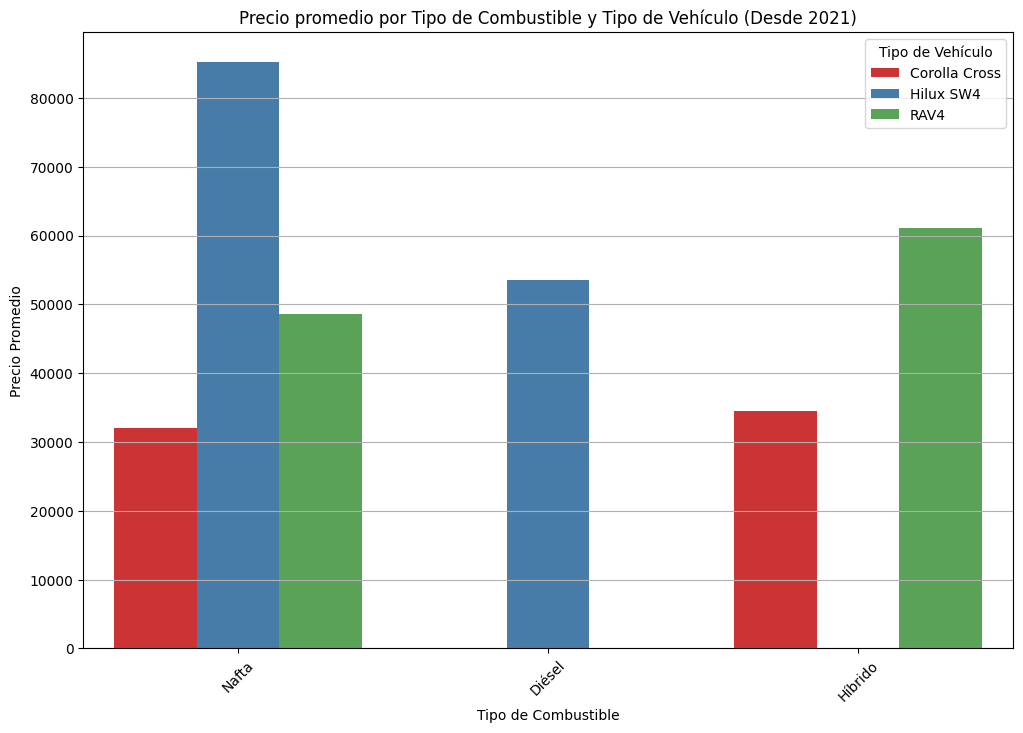

In [31]:
archivo_csv = '../data/procesed/cambios_en_combustible.csv'
data = pd.read_csv(archivo_csv)
data.columns = data.columns.str.strip()
data_filtrada = data[data['Año'] > 2020]

plt.figure(figsize=(12, 8))
sns.barplot(
    data=data_filtrada, 
    x='Tipo de combustible', 
    y='Precio', 
    hue='Tipo', 
    palette='Set1', 
    ci=None  
)
plt.title('Precio promedio por Tipo de Combustible y Tipo de Vehículo (Desde 2021)')
plt.xlabel('Tipo de Combustible')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Vehículo')
plt.grid(axis='y')  
plt.show()



Primero se hizo una limpieza de datos incorrectos, ya que habían vehículos que figuraba que eran eléctricos con caja manual, algo que no es posible para estos modelos. Luego se hizo una búsqueda sobre los modelos de la Hilux SW4 y se descrubrió que no existe autos eléctricos de este modelo, entonces se curaron estos datos. 

Se decicidío hacer un promedio de los vehículos vendidos desde el año en el que se pone a la venta el Corolla Cross, 2021, para ver que modelo y con qué combustible es más barato su compra. Tras observar el gráfico se puede apreciar como la Hilux SW4 naftera es la SUV más cara, seguida por la RAV4 híbrida. Con estos datos se puede concluir que en el caso de la Hilux SW4 la que funciona con nafta es más cara que la que funciona con Diésel, y no se vende una Hilux SW4 híbrida. Luego, en el caso de la RAV4, el modelo híbrido es más caro que el naftero; pero este gráfico en cierto modo tiene un problema ya que a partir de 2023 se dejó de vender este modelo de SUV en Argentina, entonces no se tienen los datos más recientes. Por último el Corolla Cross, más barato que los otros modelos, tiene su precio más alto cuando se vende en su versión híbrida que su versión naftera. 

#### vi) Comparar los precios de venta en función del tipo de transmisión del vehículo.

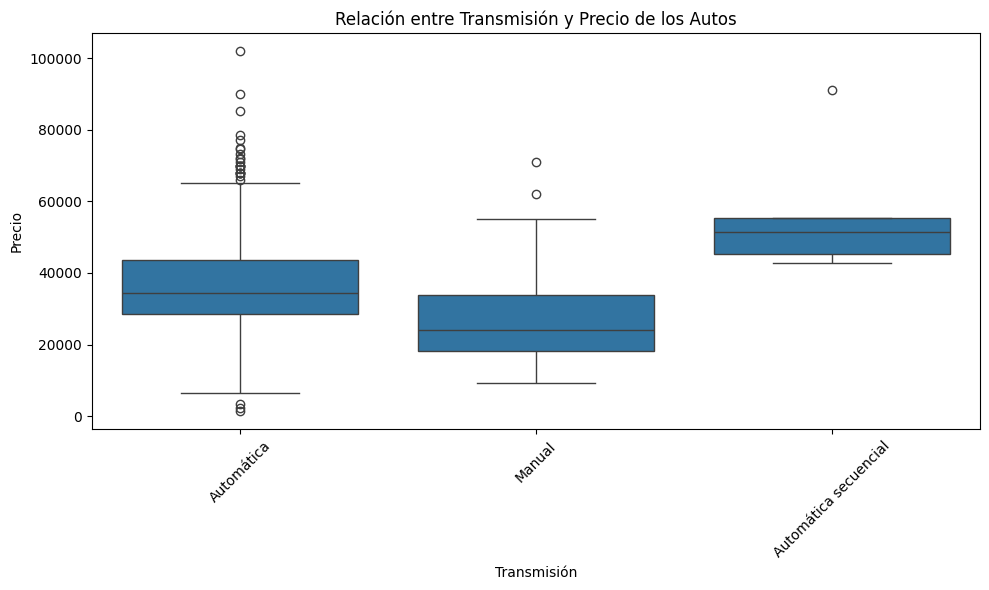

In [32]:
archivo_csv = '../data/raw/toyota_dev.csv'
data = pd.read_csv(archivo_csv)
data.columns = data.columns.str.strip()
data = data.dropna(subset=['Transmisión', 'Precio'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmisión', y='Precio', data=data)
plt.title('Relación entre Transmisión y Precio de los Autos')
plt.xlabel('Transmisión')
plt.ylabel('Precio')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

Es notable como los vehículos con caja automática secuencial tienen el precio promedio más caro del mercado, seguidos por los que tienen cada automática y por último los que funcionan con caja de cambios manual. 

#### vii) Graficar la relación entre el tipo de vendedor y el precio de venta. ¿Hay alguna tendencia o patrón en los precios en función del tipo de vendedor?

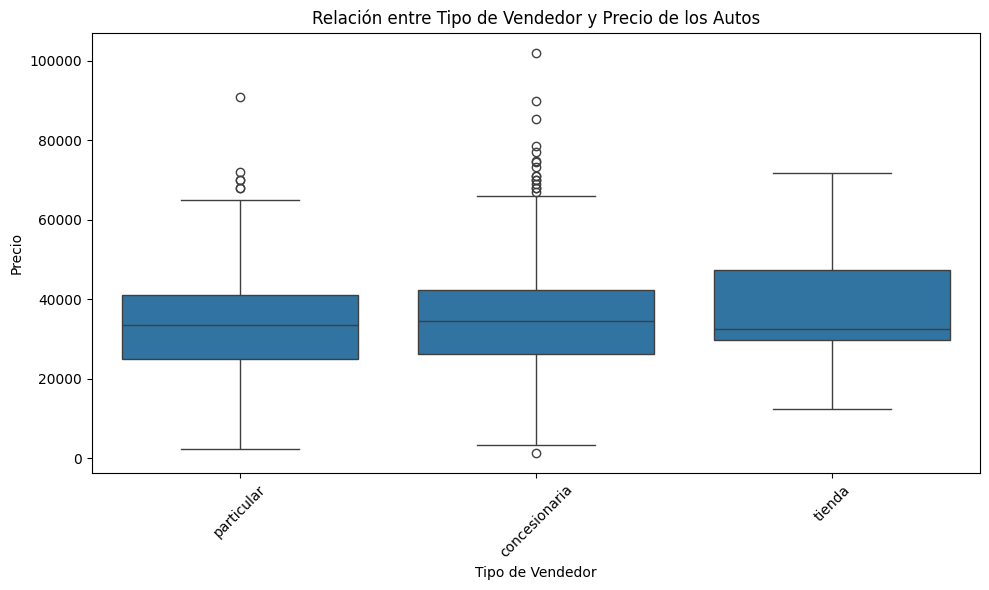

In [33]:
archivo_csv = '../data/raw/toyota_dev.csv'
data = pd.read_csv(archivo_csv)
data.columns = data.columns.str.strip()
data = data.dropna(subset=['Tipo de vendedor', 'Precio'])  

plt.figure(figsize=(10, 6))
sns.boxplot(x='Tipo de vendedor', y='Precio', data=data)
plt.title('Relación entre Tipo de Vendedor y Precio de los Autos')
plt.xlabel('Tipo de Vendedor')
plt.ylabel('Precio')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()


Con este gráfico de caja y bigote se puede observar como el precio en tienda, es decir de un revendedor que no necesariamente está ligado con la marca, es el más caro, dado a la comisión que se lleva el revendedor. Luego, el precio en concesionaria es el que le sigue, siendo el precio de comprarlo con un particular el más barato. 

#### viii) Generar la matriz de correlación entre las características y el precio de venta. ¿Qué puede deducir a partir de estos resultados?

In [34]:
archivo_csv = '../data/procesed/para_la_matriz.csv'
data = pd.read_csv(archivo_csv)
data.columns = data.columns.str.strip()  
data = data.drop(columns=['id'])

tipo_conversion = { 
    'Hilux SW4': 100.0,
    'RAV4': 150.0,
    'Corolla Cross': 250.0
}
color_conversion = { # Nivel de rareza, menor frecuencia en el dataset
    'Azul': 60.0,
    'Blanco': 10.0,
    'Gris': 20.0,
    'Gris oscuro': 70.0,
    'Negro': 30.0,
    'Plateado': 40.0,
    'Rojo': 50.0,
    'Dorado': 90.0,
    'Marrón': 80.0,
    'Verde': 100.0,
    'Violeta': 110.0
}
combustible_conversion = {
    'Diésel': 0.0,
    'Nafta': 2.0,
    'Híbrido': 5.0
}
transmision_conversion = { # Mayor tecnología de transmisión
    'Automática secuencial': 1.0,
    'Automática': 0.0,
    'Manual': -1.0
}
vendedor_conversion = {
    'concesionaria': 0.0,
    'tienda': 1.0,
    'particular': -1.0
}

data['Tipo'] = data['Tipo'].map(tipo_conversion)
data['Color'] = data['Color'].map(color_conversion)
data['Tipo de combustible'] = data['Tipo de combustible'].map(combustible_conversion)
data['Transmisión'] = data['Transmisión'].map(transmision_conversion)
data['Tipo de vendedor'] = data['Tipo de vendedor'].map(vendedor_conversion)

correlation_matrix = data.corr()
correlation_with_price = correlation_matrix['Precio']
print(correlation_with_price)


Tipo                  -0.174608
Año                    0.680168
Color                 -0.095545
Tipo de combustible   -0.144545
Transmisión            0.251450
Motor                  0.117434
Kilómetros            -0.544805
Tipo de vendedor       0.090180
Precio                 1.000000
Name: Precio, dtype: float64


Tras mapear todos los datos a valores numéricos se realizó la matriz de correlación entre las características y el precio de venta de cada vehículo. Los resultados muestran como influye cada característica en el precio. 

Si se ordenan las características en función de correlación absoluta e influencia sobre el precio, queda así:
1. Año - Alta correlación positiva, mayor el año de fabricación, mayor el precio.
2. Kilómetros - Alta correlación negativa, mayor es el kilometraje del auto, menor el precio.
3. Transmisión - Correlación positiva, mientras más moderna es la tecnología de la caja de cambios, más caro es el auto.
4. Tipo - Leve correlación negativa, pasar de una Hilux (modelo más completo) a una RAV4 a un Corolla Cross (modelo más básico) abarata el precio.
5. Motor - Leve correlación positiva, mientras mayor la cilindrada, mayor es el precio del vehículo. 
6. Color - Leve correlación negativa, mientras más raro es el color, más barato es el vehículo. 
7. Tipo de vendedor - Muy Leve correlación positiva, al pasar de un vendedor particular, a una concesionaria y a una tienda sube el precio. 

Las features que mayor peso deberían tener en un modelo predictivo son las del año de fabricación y el kilómetraje. 

# Ejercicio 2

In [3]:
import sys
import os
ROOT_DIR = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(ROOT_DIR)
sys.path.append('../src/')

import pandas as pd
import numpy as np
from src.models import RidgeRegression, LocallyWeightedRegression, NonLinearRegression
from src.data_splitting import train_val_split, create_k_train_val_splits
from src.metrics import rmse, mae, r2
from src.preprocessing import handle_missing_values, normalize, numerize
import matplotlib.pyplot as plt


In [20]:
archivo_csv = '../data/procesed/procesado_completo.csv'
data = pd.read_csv(archivo_csv)
data = data.drop(columns=['id'])
datos_curados = handle_missing_values(data)
X = datos_curados.iloc[:, :-1]  
y = datos_curados.iloc[:, -1]  

X = numerize(X)
X = normalize(X)

datos_procesados = pd.concat([X, y], axis=1)
entrenamiento, validacion = train_val_split(datos_procesados, 0.8)
X_train = entrenamiento.iloc[:, :-1]
y_train = entrenamiento.iloc[:, -1]
X_val = validacion.iloc[:, :-1]
y_val = validacion.iloc[:, -1]
y_validacion = y_val #Para el punto 3


### A) Regresión lineal

In [21]:
lambdas = [0.01, 0.1, 1, 10.0]

for lambda1 in lambdas:
    model = RidgeRegression(lambda_=lambda1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_pred = np.abs(y_pred)
    rmse_value = rmse(y_val, y_pred)
    mae_value = mae(y_val, y_pred)
    r2_value = r2(y_val, y_pred)
    print(f"""
          
Para lambda = {lambda1}""")
    print(f"RMSE: {rmse_value:.3f}")
    print(f"MAE: {mae_value:.3f}")
    print(f"R2: {r2_value:.3f}")


          
Para lambda = 0.01
RMSE: 4981.395
MAE: 3704.860
R2: 0.826

          
Para lambda = 0.1
RMSE: 4980.661
MAE: 3705.855
R2: 0.826

          
Para lambda = 1
RMSE: 4987.359
MAE: 3719.845
R2: 0.825

          
Para lambda = 10.0
RMSE: 5352.736
MAE: 4037.987
R2: 0.799


El mejor valor de $\lambda$ es $\lambda = 0.1$

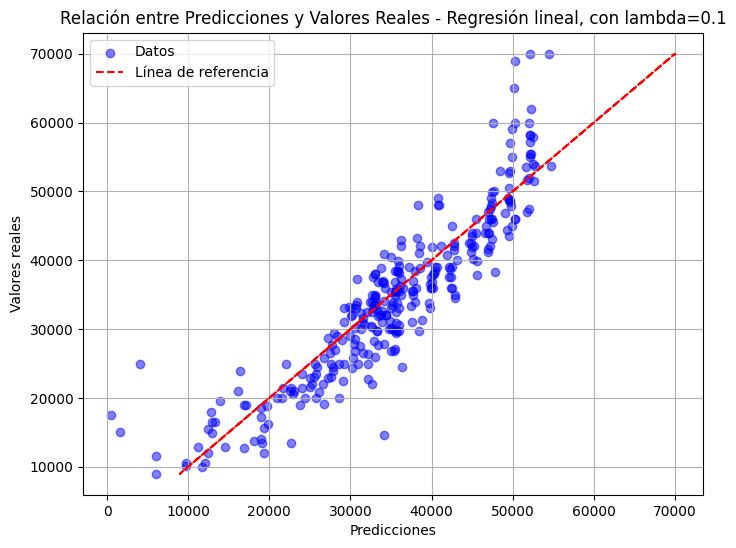

In [22]:
model = RidgeRegression(lambda_=0.1)
model.fit(X_train, y_train)
y_pred_RR = model.predict(X_val)
y_pred_RR = np.abs(y_pred_RR)

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_RR, y_val, color='blue', alpha=0.5)
plt.plot(y_val, y_val, color='red', linestyle='--') 
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Relación entre Predicciones y Valores Reales - Regresión lineal, con lambda=0.1')
plt.grid(True)
plt.legend(['Datos', 'Línea de referencia'])
plt.show()


### B) Regresión localmente ponderada con la función $$K(x, x_i) = exp(-\frac{||x-x_i||^2}{2\tau^2})$$

In [23]:
taus = [0.1, 0.5, 1, 5]
for tau_ in taus:
    model = LocallyWeightedRegression(tau=tau_)
    X_train_np = X_train.values
    y_train_np = y_train.values
    X_val_np = X_val.values
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse_value = rmse(y_val, y_pred)
    mae_value = mae(y_val, y_pred)
    r2_value = r2(y_val, y_pred)
    print(f"""
Para tau = {tau_}""")
    print(f"RMSE: {rmse_value:.3f}")
    print(f"MAE: {mae_value:.3f}")
    print(f"R2: {r2_value:.3f}")


Para tau = 0.1
RMSE: 4202.009
MAE: 2652.550
R2: 0.876

Para tau = 0.5
RMSE: 4307.603
MAE: 3279.728
R2: 0.870

Para tau = 1
RMSE: 4999.910
MAE: 3793.716
R2: 0.824

Para tau = 5
RMSE: 5324.762
MAE: 4021.297
R2: 0.801


El mejor valor para $\tau$ es $\tau = 0.1$

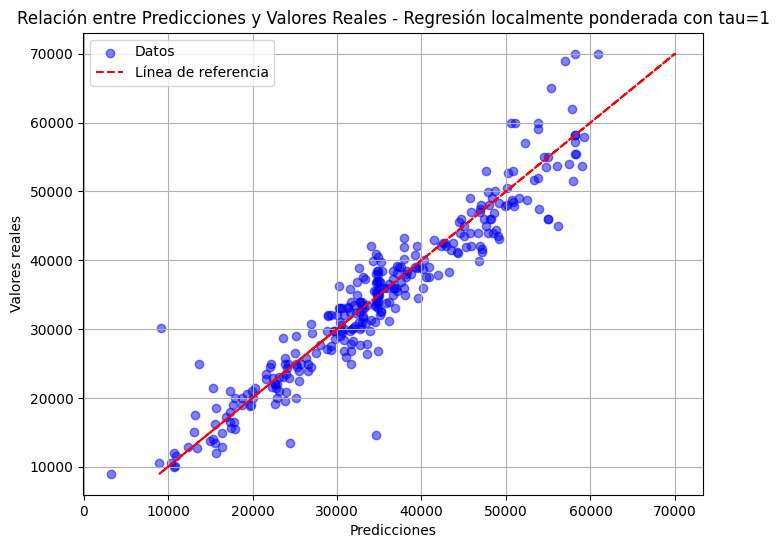

In [36]:

model = LocallyWeightedRegression(tau=0.1)
model.fit(X_train, y_train)
y_pred_LWR = model.predict(X_val)
y_pred_LWR  = np.abs(y_pred_LWR)

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_LWR, y_val, color='blue', alpha=0.5)
plt.plot(y_val, y_val, color='red', linestyle='--') 
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Relación entre Predicciones y Valores Reales - Regresión localmente ponderada con tau=1')
plt.grid(True)
plt.legend(['Datos', 'Línea de referencia'])
plt.show()

### C) Regresión no lineal

In [25]:
degrees = [2, 3, 4, 5]
for degree_ in degrees:
    model = NonLinearRegression(degree=degree_)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse_value = rmse(y_val, y_pred)
    mae_value = mae(y_val, y_pred)
    r2_value = r2(y_val, y_pred)
    print(f"""
Para un polinomio de grado {degree_}""")
    print(f"RMSE: {rmse_value:.3f}")
    print(f"MAE: {mae_value:.3f}")
    print(f"R2: {r2_value:.3f}")



Para un polinomio de grado 2
RMSE: 4043.440
MAE: 2970.453
R2: 0.885

Para un polinomio de grado 3
RMSE: 4004.701
MAE: 2945.347
R2: 0.887

Para un polinomio de grado 4
RMSE: 14524.757
MAE: 11330.618
R2: -0.483

Para un polinomio de grado 5
RMSE: 688580.098
MAE: 463153.826
R2: -3331.133


El modelo que mejor predice es el del polinomio de grado 3, pero por risego a overfittear se va a utilizar el modelo con el polinomio de grado 2, que tiene métricas de error muy similares. Mayores grados ya comienzan a funcionar de manera incorrecta.

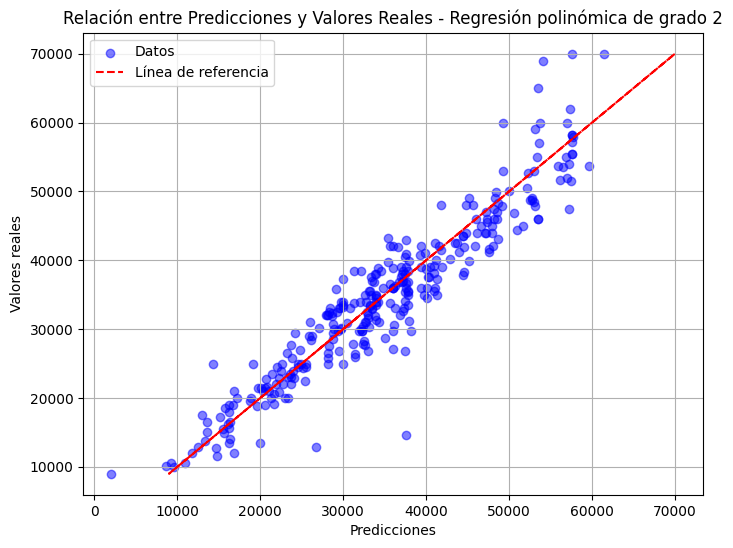

In [26]:
model = NonLinearRegression(degree=2)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
y_pred_NLR  = np.abs(y_pred)

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_NLR, y_val, color='blue', alpha=0.5)
plt.plot(y_val, y_val, color='red', linestyle='--') 
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Relación entre Predicciones y Valores Reales - Regresión polinómica de grado 2')
plt.grid(True)
plt.legend(['Datos', 'Línea de referencia'])
plt.show()

# Ejercicio 3
#### Evaluar el rendimiento de los modelos RidgeRegression, NonLinearRegression y LocallyWeightedRegression de la siguiente manera:

#### A) Utilizando la metodología de validación cruzada (CV) con 5 folds sobre el conjunto de desarrollo. Reportar los valores de $RMSE_{CV}$, $MAE_{CV}$ y $R^2_{CV}$ obtenidos.

In [27]:
archivo_csv = '../data/procesed/procesado_completo.csv'
data = pd.read_csv(archivo_csv)
data = data.drop(columns=['id'])
datos_curados = handle_missing_values(data)
X = datos_curados.iloc[:, :-1]  
y = datos_curados.iloc[:, -1]  
X = numerize(X)
X = normalize(X)
splits = create_k_train_val_splits(X, y, k=5)

print("Con CV")
#RR
rmses_RR = []
maes_RR = []
r2s_RR = []
rr_cv_metrics = [] #para la tabla, ya que no son constantes los valores
for i, (X_train, X_val, y_train, y_val) in enumerate(splits):
    model = RidgeRegression(lambda_=0.1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_pred_rr_cv =  np.abs(y_pred)
    rmse_value = rmse(y_val, y_pred_rr_cv)
    mae_value = mae(y_val, y_pred_rr_cv)
    r2_value = r2(y_val, y_pred_rr_cv)
    rmses_RR.append(rmse_value)
    maes_RR.append(mae_value)
    r2s_RR.append(r2_value)
rmsecv = np.mean(rmses_RR)
rr_cv_metrics.append(rmsecv)
maecv = np.mean(maes_RR)
rr_cv_metrics.append(maecv)
r2cv = np.mean(r2s_RR)
rr_cv_metrics.append(r2cv)
print("""
Modelo de regersión lineal""")
print(f"RMSE: {rmsecv:.3f}")
print(f"MAE: {maecv:.3f}")
print(f"R2: {r2cv:.3f}")

#LWR
lwr_cv_metrics = []
rmses_LWR = []
maes_LWR = []
r2s_LWR = []
for i, (X_train, X_val, y_train, y_val) in enumerate(splits):
    model = LocallyWeightedRegression(tau=0.1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_pred_lwr_cv =  np.abs(y_pred)
    rmse_value_lwr = rmse(y_val, y_pred_lwr_cv)
    mae_value_lwr = mae(y_val, y_pred_lwr_cv)
    r2_value_lwr = r2(y_val, y_pred_lwr_cv)
    rmses_LWR.append(rmse_value_lwr)
    maes_LWR.append(mae_value_lwr)
    r2s_LWR.append(r2_value_lwr)
rmsecv = np.mean(rmses_LWR)
lwr_cv_metrics.append(rmsecv)
maecv = np.mean(maes_LWR)
lwr_cv_metrics.append(maecv)
r2cv = np.mean(r2s_LWR)
lwr_cv_metrics.append(r2cv)
print("""
Modelo de regersión localmente ponderada""")
print(f"RMSE: {rmsecv:.3f}")
print(f"MAE: {maecv:.3f}")
print(f"R2: {r2cv:.3f}")

#NLR
nlr_cv_metrics = []
rmses_NLR = []
maes_NLR = []
r2s_NLR = []
for i, (X_train, X_val, y_train, y_val) in enumerate(splits):
    model = NonLinearRegression(degree=2)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_pred_nlr_cv =  np.abs(y_pred)
    rmse_value_nlr = rmse(y_val, y_pred_nlr_cv)
    mae_value_nlr = mae(y_val, y_pred_nlr_cv)
    r2_value_nlr = r2(y_val, y_pred_nlr_cv)
    rmses_NLR.append(rmse_value_nlr)
    maes_NLR.append(mae_value_nlr)
    r2s_NLR.append(r2_value_nlr)
rmsecv = np.mean(rmses_NLR)
nlr_cv_metrics.append(rmsecv)
maecv = np.mean(maes_NLR)
nlr_cv_metrics.append(maecv)
r2cv = np.mean(r2s_NLR)
nlr_cv_metrics.append(r2cv)

print("""      
Modelo de regersión no lineal""")
print(f"RMSE: {rmsecv:.3f}")
print(f"MAE: {maecv:.3f}")
print(f"R2: {r2cv:.3f}")


Con CV

Modelo de regersión lineal
RMSE: 5618.506
MAE: 3920.342
R2: 0.809

Modelo de regersión localmente ponderada
RMSE: 5063.323
MAE: 2998.068
R2: 0.842
      
Modelo de regersión no lineal
RMSE: 4588.552
MAE: 3199.438
R2: 0.872


Con el método de Cross Validation, el modelo que mejor funciona es el de regresión no lineal. El de regresión luneal no predice tan mal, pero el de regresión localmente ponderada puede llegar a tener predicciones malas dependiendo de como se organicen los valores antes de dividir los k-folds, mientras que la RidgeRegression nunca falla así. 

### B) Evaluando el rendimiento de los modelos sobre el conjunto de prueba para obtener una estimación del rendimiento general en datos no vistos. Reportar los valores de $RMSE_{test}$, $MAE_{test}$ y $R^2_{test}$  obtenidos.

In [5]:
archivo_csv = '../data/procesed/procesado_completo.csv'
data = pd.read_csv(archivo_csv)
data = data.drop(columns=['id'])
datos_curados = handle_missing_values(data)
X = datos_curados.iloc[:, :-1]  
y = datos_curados.iloc[:, -1]  
X = numerize(X)
X = normalize(X)
datos_procesados = pd.concat([X, y], axis=1)
entrenamiento, validacion = train_val_split(datos_procesados, 0.8)
X_train = entrenamiento.iloc[:, :-1]
y_train = entrenamiento.iloc[:, -1]
X_val = validacion.iloc[:, :-1]
y_val = validacion.iloc[:, -1]


archivo_csv = '../data/raw/toyota_test.csv'
data = pd.read_csv(archivo_csv)
data = data.drop(columns=['id'])
datos_curados = handle_missing_values(data)
Xt = datos_curados.iloc[:, :-1]  
yt = datos_curados.iloc[:, -1]  
Xt = numerize(Xt)
Xt = normalize(Xt)
y_validacion_t = yt


In [29]:
model = RidgeRegression(lambda_=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(Xt)
y_pred_RR_t = np.abs(y_pred)
rmse_value = rmse(yt, y_pred_RR_t)
mae_value = mae(yt, y_pred_RR_t)
r2_value = r2(yt, y_pred_RR_t)
print("Modelo de regresión lineal con lambda=0.1")
print(f"RMSE: {rmse_value:.3f}")
print(f"MAE: {mae_value:.3f}")
print(f"R2: {r2_value:.3f}")



Modelo de regresión lineal con lambda=0.1
RMSE: 4982.255
MAE: 3639.936
R2: 0.831


In [30]:
model = LocallyWeightedRegression(tau=0.7)
model.fit(X_train, y_train)
y_predi = model.predict(Xt)
y_pred_LWR_t  = np.abs(y_predi)
rmse_value = rmse(yt, y_pred_LWR_t)
mae_value = mae(yt, y_pred_LWR_t)
r2_value = r2(yt, y_pred_LWR_t)
print("Modelo de regresión localmente ponderada con tau=0.1 ")
print(f"RMSE: {rmse_value:.3f}")
print(f"MAE: {mae_value:.3f}")
print(f"R2: {r2_value:.3f}")

Modelo de regresión localmente ponderada con tau=0.1 
RMSE: 4848.657
MAE: 3444.511
R2: 0.840


In [31]:
model = NonLinearRegression(degree=2)
model.fit(X_train, y_train)
y_pred = model.predict(Xt)
y_pred_NLR_t  = np.abs(y_pred)
rmse_value = rmse(yt, y_pred_NLR_t)
mae_value = mae(yt, y_pred_NLR_t)
r2_value = r2(yt, y_pred_NLR_t)
print("Modelo de regresión polinómica de grado 2")
print(f"RMSE: {rmse_value:.3f}")
print(f"MAE: {mae_value:.3f}")
print(f"R2: {r2_value:.3f}")

Modelo de regresión polinómica de grado 2
RMSE: 4123.230
MAE: 3073.748
R2: 0.884


Los tres modelos parecerían aproximar correctamente al set de test, set con el que no se toparon antes. 

### C) Comparar los resultados obtenidos en los dos incisos anteriores con los del split de entrenamiento-validación realizado previamente.
#### 1. Elaborar una tabla comparativa que muestre los valores de RMSE, MAE y R2 para cada modelo en los siguientes conjuntos: Validación, Cross Validation, Test.

In [32]:
rr_cv_metrics = [round(valor, 3) for valor in rr_cv_metrics]
lwr_cv_metrics = [round(valor, 3) for valor in lwr_cv_metrics]
nlr_cv_metrics = [round(valor, 3) for valor in nlr_cv_metrics]

data_rr = {
    'Conjunto': ['Val', 'CV', 'Test'],
    'RMSE': [4980.661, rr_cv_metrics[0], 4982.255],
    'MAE': [3705.855, rr_cv_metrics[1], 3639.936],
    'R2': [0.826, rr_cv_metrics[2], 0.831]
}
data_lwr = {
    'Conjunto': ['Val', 'CV', 'Test'],
    'RMSE': [4202.009, lwr_cv_metrics[0], 4848.657],
    'MAE': [2652.550, lwr_cv_metrics[1], 3444.511],
    'R2': [0.876,lwr_cv_metrics[2], 0.840]
}
data_nlr = {
    'Conjunto': ['Val', 'CV', 'Test'],
    'RMSE': [4043.440, nlr_cv_metrics[0], 4123.230],
    'MAE': [2970.453, nlr_cv_metrics[1], 3073.748],
    'R2': [0.885, nlr_cv_metrics[2], 0.884]
}
df_rr = pd.DataFrame(data_rr)
df_lwr = pd.DataFrame(data_lwr)
df_nlr = pd.DataFrame(data_nlr)
print("Modelo RidgeRegresion:")
print(df_rr)
print("\nModelo LocallyWeightedRegression:")
print(df_lwr)
print("\nModelo NonLinearRegresion:")
print(df_nlr)


Modelo RidgeRegresion:
  Conjunto      RMSE       MAE     R2
0      Val  4980.661  3705.855  0.826
1       CV  5618.506  3920.342  0.809
2     Test  4982.255  3639.936  0.831

Modelo LocallyWeightedRegression:
  Conjunto      RMSE       MAE     R2
0      Val  4202.009  2652.550  0.876
1       CV  5063.323  2998.068  0.842
2     Test  4848.657  3444.511  0.840

Modelo NonLinearRegresion:
  Conjunto      RMSE       MAE     R2
0      Val  4043.440  2970.453  0.885
1       CV  4588.552  3199.438  0.872
2     Test  4123.230  3073.748  0.884


Estos resultados permiten un análisis de rendimiento de cada modelo. Se puede concluir en que el modelo de regresión no lineal es el que mejor predice los precios de los vehículos, dado a que tiene el menor RMSE y el mayor R2 promedio. Luego el modelo localmente ponderado obtiene mejores resultados que el de regresión lineal, pero cuando se lo ejecuta con Cross Validation puede llegar a tener sus métricas fuera de rango. Lógicamente el congunto de 'training' y 'validation' tiene la mejor predicción, aunque la predicciones sobre el set de test no están tan alejadas en sus métricas de error, lo cual es positivo ya que son datos completamente nuevos para el modelo, y con los cuales no puede overfittear.

#### 3. Para cada conjunto (train, validation, “held out” de CV y test) y para cada uno de los tres modelos implementados, graficar el diagrama de dispersión de las predicciones $\hat{y}$ frente a los valores verdaderos $y$. Organizar los gráficos en una grilla de 4 filas por 3 columnas, donde cada fila corresponda a un conjunto y cada columna a un modelo.

In [33]:
model = RidgeRegression(lambda_=0.1)
model.fit(X_train, y_train)
y_pred_rr_training = model.predict(X_train)

model = LocallyWeightedRegression(tau=0.7)
model.fit(X_train, y_train)
y_pred_lwr_training = model.predict(X_train)

model = NonLinearRegression(degree=2)
model.fit(X_train, y_train)
y_pred_nlr_training = model.predict(X_train)


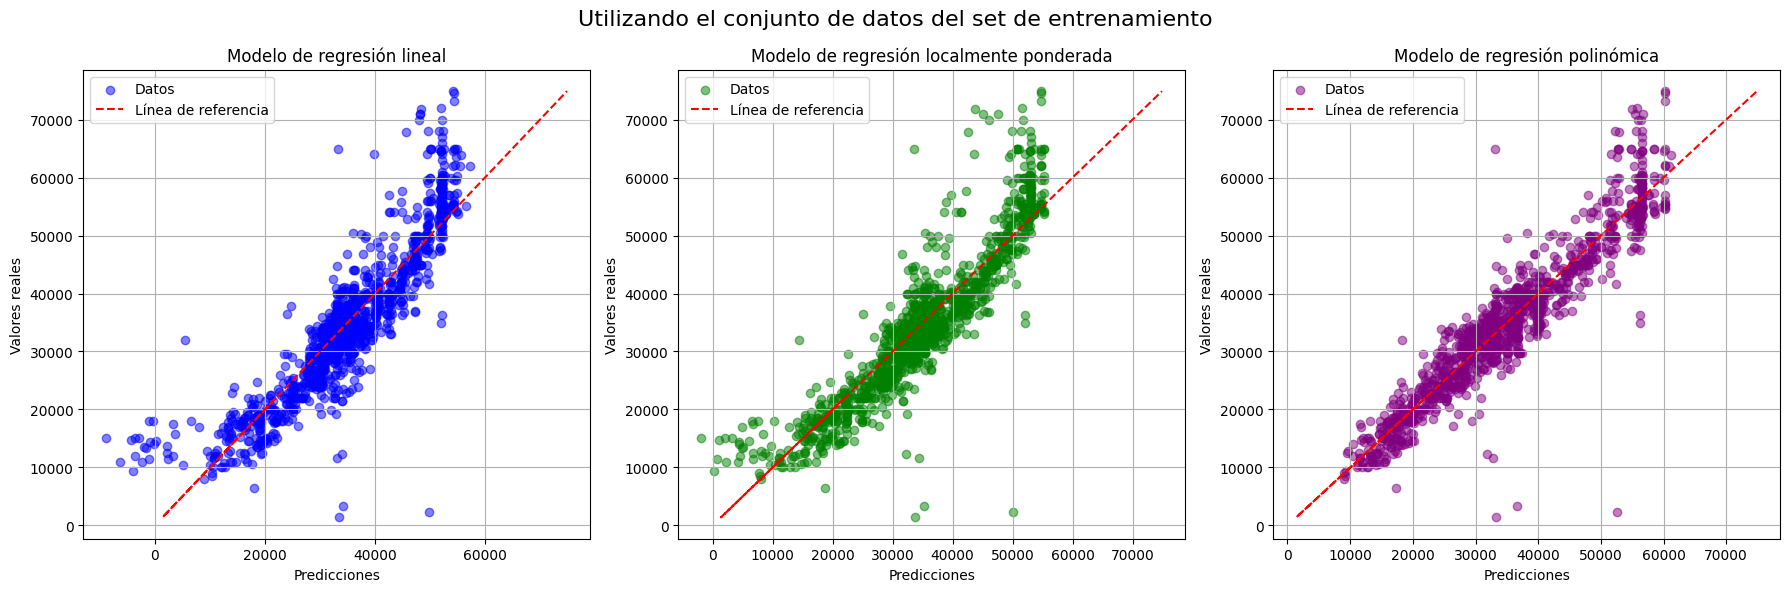

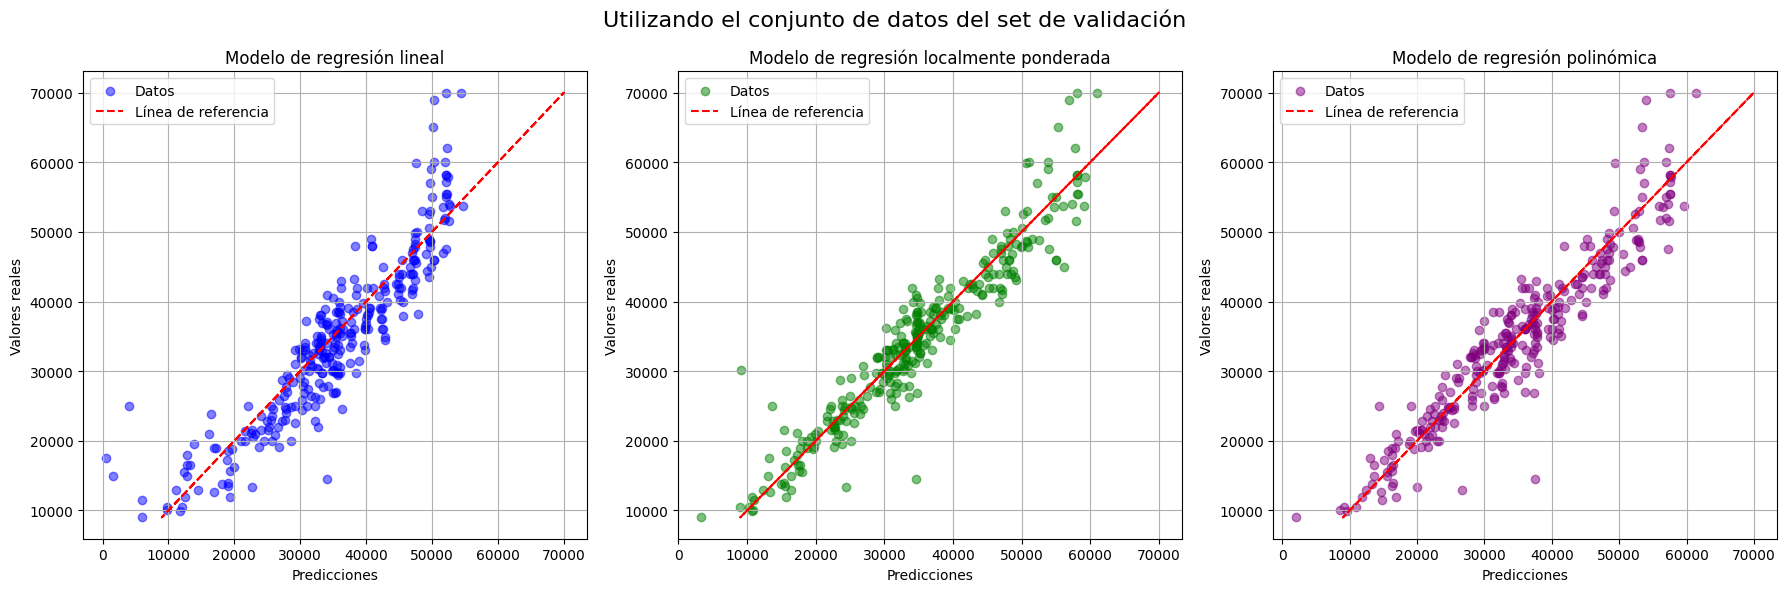

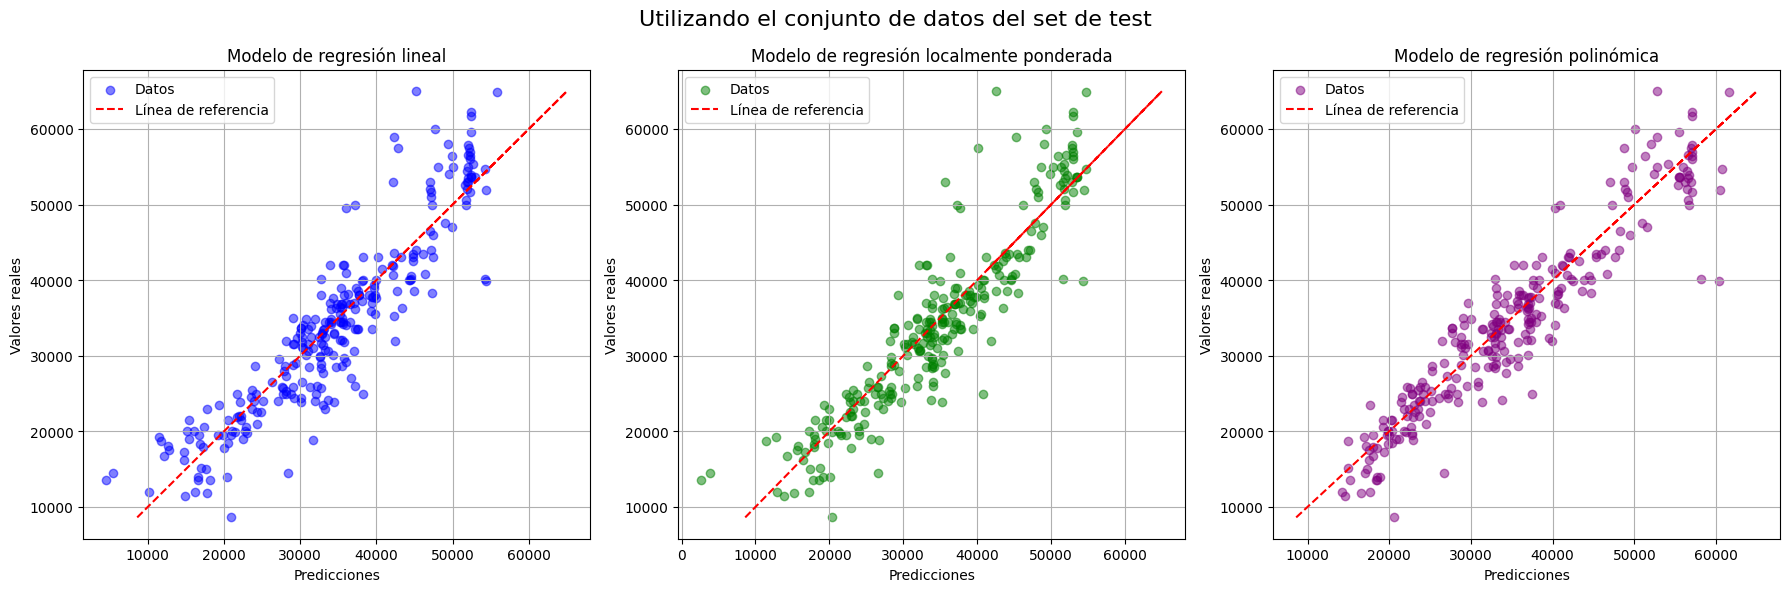

In [42]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.scatter(y_pred_rr_training, y_train, color='blue', alpha=0.5)
plt.plot(y_train, y_train, color='red', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Modelo de regresión lineal')
plt.grid(True)
plt.legend(['Datos', 'Línea de referencia'])
plt.subplot(1, 3, 2)
plt.scatter(y_pred_lwr_training, y_train, color='green', alpha=0.5)
plt.plot(y_train, y_train, color='red', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Modelo de regresión localmente ponderada')
plt.grid(True)
plt.legend(['Datos', 'Línea de referencia'])
plt.subplot(1, 3, 3)
plt.scatter(y_pred_nlr_training, y_train, color='purple', alpha=0.5)
plt.plot(y_train, y_train, color='red', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Modelo de regresión polinómica')
plt.grid(True)
plt.legend(['Datos', 'Línea de referencia'])
plt.suptitle('Utilizando el conjunto de datos del set de entrenamiento', fontsize=16)
plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.scatter(y_pred_RR, y_validacion, color='blue', alpha=0.5)
plt.plot(y_validacion, y_validacion, color='red', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Modelo de regresión lineal')
plt.grid(True)
plt.legend(['Datos', 'Línea de referencia'])
plt.subplot(1, 3, 2)
plt.scatter(y_pred_LWR, y_validacion, color='green', alpha=0.5)
plt.plot(y_validacion, y_validacion, color='red', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Modelo de regresión localmente ponderada')
plt.grid(True)
plt.legend(['Datos', 'Línea de referencia'])
plt.subplot(1, 3, 3)
plt.scatter(y_pred_NLR, y_validacion, color='purple', alpha=0.5)
plt.plot(y_validacion, y_validacion, color='red', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Modelo de regresión polinómica')
plt.grid(True)
plt.legend(['Datos', 'Línea de referencia'])
plt.suptitle('Utilizando el conjunto de datos del set de validación', fontsize=16)
plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.scatter(y_pred_RR_t, y_validacion_t, color='blue', alpha=0.5)
plt.plot(y_validacion_t, y_validacion_t, color='red', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Modelo de regresión lineal')
plt.grid(True)
plt.legend(['Datos', 'Línea de referencia'])
plt.subplot(1, 3, 2)
plt.scatter(y_pred_LWR_t, y_validacion_t, color='green', alpha=0.5)
plt.plot(y_validacion_t, y_validacion_t, color='red', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Modelo de regresión localmente ponderada')
plt.grid(True)
plt.legend(['Datos', 'Línea de referencia'])
plt.subplot(1, 3, 3)
plt.scatter(y_pred_NLR_t, y_validacion_t, color='purple', alpha=0.5)
plt.plot(y_validacion_t, y_validacion_t, color='red', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Modelo de regresión polinómica')
plt.grid(True)
plt.legend(['Datos', 'Línea de referencia'])
plt.suptitle('Utilizando el conjunto de datos del set de test', fontsize=16)
plt.tight_layout()
plt.show()



Se puede apreciar como el modelo de regresión no lineal es el que tiene la mejor predicción, ya que estas se mantienen más compactadas sobre la recta que iguala la predicción con el valor real. Además 

#### 4) Para cada uno de los tres modelos implementados, graficar la variación del precio predicho en función del año. Las predicciones deberán realizarse manteniendo todas las demás features fijas en sus valores promedio o cero, de modo que se observe únicamente el efecto del año en el precio según cada modelo.

In [27]:
import pandas as pd
archivo_csv = '../data/procesed/procesado_completo.csv'
df = pd.read_csv(archivo_csv)
df = df.drop(columns=['id'])

X = df.iloc[:, :-1]  
y = df.iloc[:, -1]  

columns_to_zero = [col for col in X.columns if col != 'Año']
X[columns_to_zero] = 0.001

model = RidgeRegression(lambda_ = 1)
model.fit(X_train, y_train)
y_prediccion_a_rr = model.predict(X)
rmse_value = rmse(y, y_prediccion_a_rr)
mae_value = mae(y, y_prediccion_a_rr)
r2_value = r2(y, y_prediccion_a_rr)
print("Modelo de regresión lineal")
print(f"RMSE: {rmse_value:.3f}")
print(f"MAE: {mae_value:.3f}")
print(f"R2: {r2_value:.3f}")

model = LocallyWeightedRegression(tau = 1)
model.fit(X_train, y_train)
y_prediccion_a_lwr = model.predict(X)
rmse_value = rmse(y, y_prediccion_a_lwr)
mae_value = mae(y, y_prediccion_a_lwr)
r2_value = r2(y, y_prediccion_a_lwr)
print("""
Modelo de regresión localmente ponderada""")
print(f"RMSE: {rmse_value:.3f}")
print(f"MAE: {mae_value:.3f}")
print(f"R2: {r2_value:.3f}")


model = NonLinearRegression(degree = 2)
model.fit(X_train, y_train)
y_prediccion_a_nlr = model.predict(X)
rmse_value = rmse(y, y_prediccion_a_nlr)
mae_value = mae(y, y_prediccion_a_nlr)
r2_value = r2(y, y_prediccion_a_nlr)
print("""
Modelo de regresión no lineal""")
print(f"RMSE: {rmse_value:.3f}")
print(f"MAE: {mae_value:.3f}")
print(f"R2: {r2_value:.3f}")


Modelo de regresión lineal
RMSE: 113648287.610
MAE: 113647866.730
R2: -77192794.179

Modelo de regresión localmente ponderada
RMSE: 37143.800
MAE: 34818.694
R2: -7.246

Modelo de regresión no lineal
RMSE: 14225.482
MAE: 11546.457
R2: -0.209


El modelo de regresión lineal predice de una manera precaria, el de la regresión localmente ponderada parecería mejorar un poco (no demasiado ya que el error es casi del mismo tamaño que el precio de un auto promedio) pero cuando el único feature es la vejez del vehiculo, el modelo que mejor predice el precio es el de regresión no lineal, el que usa el polinomio de grado 2.

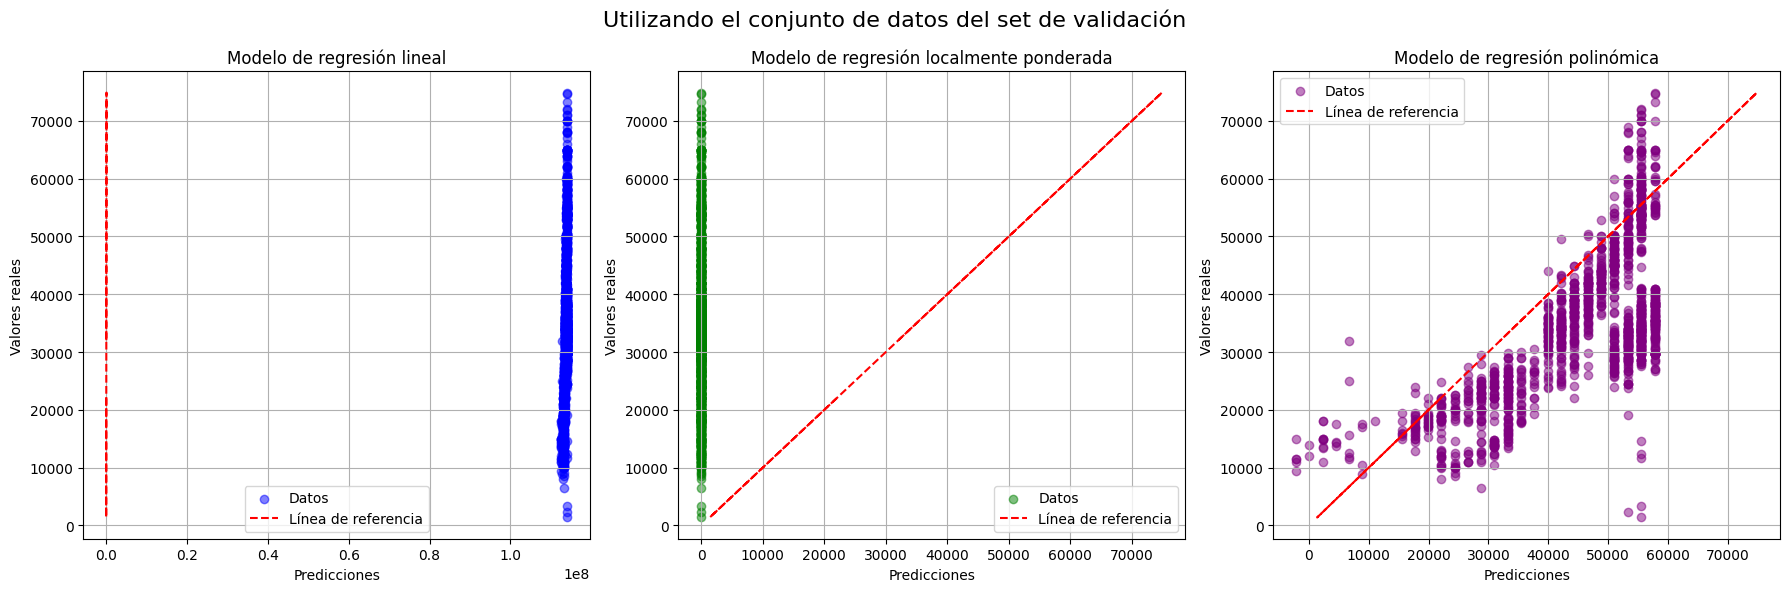

In [29]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.scatter(y_prediccion_a_rr, y, color='blue', alpha=0.5)
plt.plot(y, y, color='red', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Modelo de regresión lineal')
plt.grid(True)
plt.legend(['Datos', 'Línea de referencia'])
plt.subplot(1, 3, 2)
plt.scatter(y_prediccion_a_lwr, y, color='green', alpha=0.5)
plt.plot(y, y, color='red', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Modelo de regresión localmente ponderada')
plt.grid(True)
plt.legend(['Datos', 'Línea de referencia'])
plt.subplot(1, 3, 3)
plt.scatter(y_prediccion_a_nlr, y, color='purple', alpha=0.5)
plt.plot(y, y, color='red', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Modelo de regresión polinómica')
plt.grid(True)
plt.legend(['Datos', 'Línea de referencia'])
plt.suptitle('Utilizando el conjunto de datos del set de validación', fontsize=16)
plt.tight_layout()
plt.show()

Los primeros dos modelos hacen un horrible trabajo a la hora de predecir el precio por año, pero el modelo re regresión polinómica es el único que se acera y cruza la recta que iguala cada valor real y con su predicción. 